In [1]:
%matplotlib inline

In [2]:
from IPython.display import Image
import pandas as pd
import numpy as np

# Intro to Pandas

`pandas` is in **no small part** the reason I started using `python`

It makes working with data `agile` and `flexible`

## Series and DataFrame Objects

Many examples are taken from: http://pandas.pydata.org/pandas-docs/stable/dsintro.html

The two **primary** data objects in Pandas are:

1. Series
2. DataFrames

DataFrames can be thought of as a collection of Series. 

Selecting a column in a DataFrame will return a Series Object.

The `columns` and `rows` are accessible using `labels` and provides the core infrastructure for `labelled arrays`

A **key** to `pandas`:

> Data Alignment is intrinsic, so the link between labels and data will not be broken unless done so explicitly by you.

### Series

**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index which can include Index or MultiIndex objects

```
s = pd.Series(data, index=index)
```

data can take many different forms (i.e. dict, ndarray, lists, scalar etc)

#### From Numpy Arrays

In [3]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [4]:
type(s)

pandas.core.series.Series

In [5]:
s

a    1.379984
b   -0.954181
c    0.395836
d   -0.098395
e   -0.419872
dtype: float64

In [6]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [7]:
#-No Index Specified then will default to a numeric index-#
s = pd.Series(np.random.randn(5))

In [8]:
s

0    1.790177
1    1.589806
2   -2.233775
3   -1.415529
4    1.945331
dtype: float64

#### Series Objects are Similar to Array Behaviour

In [9]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [10]:
s

a    0.671275
b    1.438878
c   -1.107581
d    0.920123
e    1.092827
dtype: float64

In [11]:
s[0]

0.6712753016349293

In [12]:
s[1:3]

b    1.438878
c   -1.107581
dtype: float64

In [13]:
s.median()

0.9201226019557367

In [14]:
s[s > s.median()]

b    1.438878
e    1.092827
dtype: float64

In [15]:
s[[3,2,1]]

d    0.920123
c   -1.107581
b    1.438878
dtype: float64

#### Indexing via labels can be done through the `loc` operator (more important for DataFrames)

In [16]:
s.loc[['d','e']]

d    0.920123
e    1.092827
dtype: float64

**but** you can also use masks for pd.Series

In [17]:
s[['d','e']]

d    0.920123
e    1.092827
dtype: float64

#### Operations on Series Objects (Context Driven)

In [18]:
s

a    0.671275
b    1.438878
c   -1.107581
d    0.920123
e    1.092827
dtype: float64

In [19]:
s + s

a    1.342551
b    2.877755
c   -2.215163
d    1.840245
e    2.185653
dtype: float64

In [20]:
s * 2   # the value 2 is broadcast across s

a    1.342551
b    2.877755
c   -2.215163
d    1.840245
e    2.185653
dtype: float64

In [21]:
np.sqrt(s)

/Users/rsitworkshop/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


a    0.819314
b    1.199532
c         NaN
d    0.959230
e    1.045384
dtype: float64

A **key** difference between Series and ndarray is that operations between Series automatically align the data based on **labels**. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [22]:
s[2:]                  #No A,B

c   -1.107581
d    0.920123
e    1.092827
dtype: float64

In [23]:
s[:-2]                  #No D,E

a    0.671275
b    1.438878
c   -1.107581
dtype: float64

In [24]:
s[2:] + s[:-2]         #Only C, Alignment is automatic, Union of Index Values

a         NaN
b         NaN
c   -2.215163
d         NaN
e         NaN
dtype: float64

#### Useful Built In Methods

In [25]:
s.describe()

count    5.000000
mean     0.603104
std      0.996235
min     -1.107581
25%      0.671275
50%      0.920123
75%      1.092827
max      1.438878
dtype: float64

-----------------------------------------------------------------------

### DataFrame

Reference: https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. **It is generally the most commonly used pandas object**. Like Series, DataFrame accepts many different kinds of input:

1. Dictionary of 1D ndarrays, lists, dicts, or Series
1. 2-D numpy.ndarray
1. A Series
1. Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments.

**Note:** DataFrames have become a standard in the Python ecosystem and can be used with a lot of packages such as **statsmodels**, **scikit-learn** ...

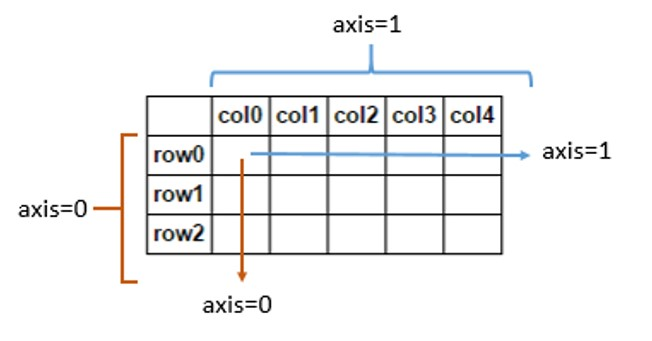

In [26]:
Image(filename='img/dataframe.jpg')

In [27]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)

In [28]:
df          #-Automatic Alignment of Series based on Index-#

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [29]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [30]:
df.columns

Index(['one', 'two'], dtype='object')

#### Accessing Columns

In [31]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [32]:
type(df['one'])

pandas.core.series.Series

#### Accessing Rows

In [33]:
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [34]:
type(df.loc['b'])

pandas.core.series.Series

#### Adding Rows

In [35]:
df['three'] = df['one'] + df['two']

In [36]:
df

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


#### Selecting Multiple Columns

In [37]:
df[['one','three']]

,one,three
a,1.0,2.0
b,2.0,4.0
c,3.0,6.0
d,NaN,NaN


#### Selecting Multiple Rows

In [38]:
df.loc[['b','c']]

,one,two,three
b,2.0,2.0,4.0
c,3.0,3.0,6.0


#### Inserting Scalars

In [41]:
df['four'] = "What"   #Fill the Column

In [42]:
df

,one,two,three,four
a,1.0,1.0,2.0,What
b,2.0,2.0,4.0,What
c,3.0,3.0,6.0,What
d,NaN,4.0,NaN,What


#### Deleting a Column

In [43]:
del df['four']

In [44]:
df

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


## Index Objects and Reshaping

In [45]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})

In [46]:
df

,A,B,C,D,E
0,one,A,foo,-0.550593,0.079924
1,one,B,foo,2.203497,1.766715
2,two,C,foo,0.210577,1.120389
3,three,A,bar,1.409281,-0.537678
4,one,B,bar,0.568275,0.814791
5,one,C,bar,-1.045738,-1.006886
6,two,A,foo,-0.614645,-0.139135
7,three,B,foo,0.869673,-0.098668
8,one,C,foo,0.440152,-0.577213
9,one,A,bar,1.442761,-0.558040


In [47]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.442761 -0.550593
      B  0.568275  2.203497
      C -1.045738  0.440152
three A  1.409281       NaN
      B       NaN  0.869673
      C -0.365821       NaN
two   A       NaN -0.614645
      B -0.360545       NaN
      C       NaN  0.210577

**Using MultiIndex** to reorganize the information in a DataFrame

In [48]:
dfi = df.set_index(['A','B','C'])

In [49]:
dfi

D         E
A     B C                      
one   A foo -0.550593  0.079924
      B foo  2.203497  1.766715
two   C foo  0.210577  1.120389
three A bar  1.409281 -0.537678
one   B bar  0.568275  0.814791
      C bar -1.045738 -1.006886
two   A foo -0.614645 -0.139135
three B foo  0.869673 -0.098668
one   C foo  0.440152 -0.577213
      A bar  1.442761 -0.558040
two   B bar -0.360545  0.732137
three C bar -0.365821  1.019848

In [51]:
dfi.unstack(level='C')

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A  1.442761 -0.550593 -0.558040  0.079924
      B  0.568275  2.203497  0.814791  1.766715
      C -1.045738  0.440152 -1.006886 -0.577213
three A  1.409281       NaN -0.537678       NaN
      B       NaN  0.869673       NaN -0.098668
      C -0.365821       NaN  1.019848       NaN
two   A       NaN -0.614645       NaN -0.139135
      B -0.360545       NaN  0.732137       NaN
      C       NaN  0.210577       NaN  1.120389

In [52]:
dfi['D'].unstack(level='C')

C             bar       foo
A     B                    
one   A  1.442761 -0.550593
      B  0.568275  2.203497
      C -1.045738  0.440152
three A  1.409281       NaN
      B       NaN  0.869673
      C -0.365821       NaN
two   A       NaN -0.614645
      B -0.360545       NaN
      C       NaN  0.210577

-----------------------------------------------------------------------

## Split-Apply-Combine

DataFrames also support more advanced operations such as **groupby**  which can be very powerful when aggregating data based on groups and performing some operations over them

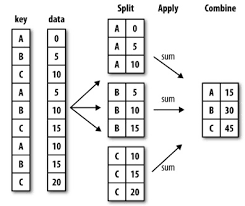

In [53]:
Image(filename='img/split-apply-combine.png')

In [62]:
key = ['A','B','C','A','B','C','A','B','C']
data = [0, 5, 10, 5, 10, 15, 10, 15, 20]
df = pd.DataFrame(data, index=key, columns=['data'])

In [63]:
df

,data
A,0
B,5
C,10
A,5
B,10
C,15
A,10
B,15
C,20


You can groupby a level in an `index`

In [64]:
df.groupby(level=0).sum()

,data
A,15
B,30
C,45


In [65]:
#Groupby values in a column-#
df = df.reset_index()

In [66]:
df.columns=["key","data"]

In [68]:
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


You can also groupby the contents of a `column`

In [69]:
df.groupby(by=["key"]).sum()

,data
key,
A,15
B,30
C,45


## Working with Special Types of Data (TimeSeries)

**Pandas** has a support for different types of data such as:

Reference: http://pandas.pydata.org/pandas-docs/stable/10min.html

In [70]:
rng = pd.date_range('1/1/2012', periods=200, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [71]:
ts.head()

2012-01-01 00:00:00    311
2012-01-01 00:00:01     83
2012-01-01 00:00:02    472
2012-01-01 00:00:03    177
2012-01-01 00:00:04    183
Freq: S, dtype: int64

In [72]:
ts.tail()

2012-01-01 00:03:15    189
2012-01-01 00:03:16    480
2012-01-01 00:03:17    217
2012-01-01 00:03:18     73
2012-01-01 00:03:19    224
Freq: S, dtype: int64

#### Resampling the Time Series

In [73]:
ts.resample('1Min')

In [76]:
# Resample to 1Min using means
ts.resample('1Min').mean()

2012-01-01 00:00:00    250.583333
2012-01-01 00:01:00    235.816667
2012-01-01 00:02:00    244.816667
2012-01-01 00:03:00    293.600000
Freq: T, dtype: float64

In [77]:
# Resample to 1Min to using a sum function
ts.resample('1Min').sum()

2012-01-01 00:00:00    15035
2012-01-01 00:01:00    14149
2012-01-01 00:02:00    14689
2012-01-01 00:03:00     5872
Freq: T, dtype: int64

#### Working with Time Series Data

Let's work with some random generated data)

In [78]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/1990', periods=1000))

In [79]:
s.head()

1990-01-01   -0.434292
1990-01-02    1.113384
1990-01-03    0.532642
1990-01-04   -1.499723
1990-01-05    1.096428
Freq: D, dtype: float64

In [80]:
s.tail()

1992-09-22    0.721382
1992-09-23    1.129324
1992-09-24    1.046864
1992-09-25   -0.196349
1992-09-26    0.873199
Freq: D, dtype: float64

In [81]:
len(s)

1000

In [82]:
s = s.cumsum()      #Generate a cumulative sum

In [83]:
r = s.rolling(window=60).mean()

In [84]:
data = pd.DataFrame({'s' : s, 'r' : r})

<AxesSubplot:>

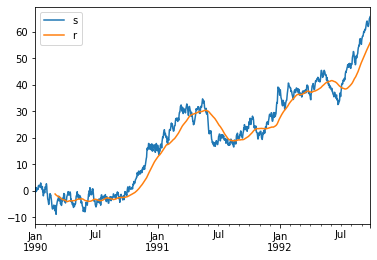

In [85]:
data.plot()

How might you make this a centered rolling mean?

**Hint:** Use introspection to look at the `s.rolling()` function